In [ ]:
import numpy as np

def edge_detection(data, type):
    """
    Performs edge detection on a 2D array (e.g., an image) using various
    convolution kernels.

    Args:
        data (numpy.ndarray or list of lists): The input 2D array (image data).
        type (str): The type of edge detection to perform.
                    Supported types: 'sobel', 'prewitt', 'roberts', 'laplacian', 'scharr'.

    Returns:
        numpy.ndarray: The gradient magnitude (edge-detected image).

    Raises:
        ValueError: If an unsupported edge detection type is provided.
    """
    data = np.array(data, dtype=float) # Ensure float type for calculations
    height, width = data.shape

    # Define kernels based on type
    if type == 'sobel':
        kernel_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]], dtype=float)
        kernel_y = np.array([[-1, -2, -1],
                             [ 0,  0,  0],
                             [ 1,  2,  1]], dtype=float)
        kernel_size = 3
    elif type == 'prewitt':
        kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]], dtype=float)
        kernel_y = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]], dtype=float)
        kernel_size = 3
    elif type == 'roberts':
        kernel_x = np.array([[1, 0],
                             [0, -1]], dtype=float)
        kernel_y = np.array([[0, 1],
                             [-1, 0]], dtype=float)
        kernel_size = 2
    elif type == 'laplacian':
        kernel_x = kernel_y = np.array([[ 0,  1,  0],
                                         [ 1, -4,  1],
                                         [ 0,  1,  0]], dtype=float)
        kernel_size = 3
    elif type == 'scharr':
        # Scharr kernels are designed to be more rotationally symmetric than Sobel
        kernel_x = np.array([[-3,  0,  3],
                             [-10, 0, 10],
                             [-3,  0,  3]], dtype=float)
        kernel_y = np.array([[-3, -10, -3],
                             [ 0,   0,  0],
                             [ 3,  10,  3]], dtype=float)
        kernel_size = 3
    else:
        raise ValueError(" Loại edge detection không được hỗ trợ. Chọn 'sobel', 'prewitt', 'roberts', 'laplacian', hoặc 'scharr'.")

    # Initialize result arrays for horizontal and vertical gradients
    res_x = np.zeros_like(data, dtype=float)
    res_y = np.zeros_like(data, dtype=float)

    pad_amount = kernel_size // 2


    for i in range(pad_amount, height - pad_amount):
        for j in range(pad_amount, width - pad_amount):
            img_region = data[i - pad_amount : i + pad_amount + 1,
                              j - pad_amount : j + pad_amount + 1]
            if img_region.shape == kernel_x.shape:
                res_x[i, j] = np.sum(img_region * kernel_x)


    for i in range(pad_amount, height - pad_amount):
        for j in range(pad_amount, width - pad_amount):
            img_region = data[i - pad_amount : i + pad_amount + 1,
                              j - pad_amount : j + pad_amount + 1]
            if img_region.shape == kernel_y.shape:
                res_y[i, j] = np.sum(img_region * kernel_y)


    gradient_magnitude = np.sqrt(res_x**2 + res_y**2)

    max_val = np.max(gradient_magnitude)
    if max_val > 0:
        gradient_magnitude = (gradient_magnitude / max_val) * 255

    return gradient_magnitude


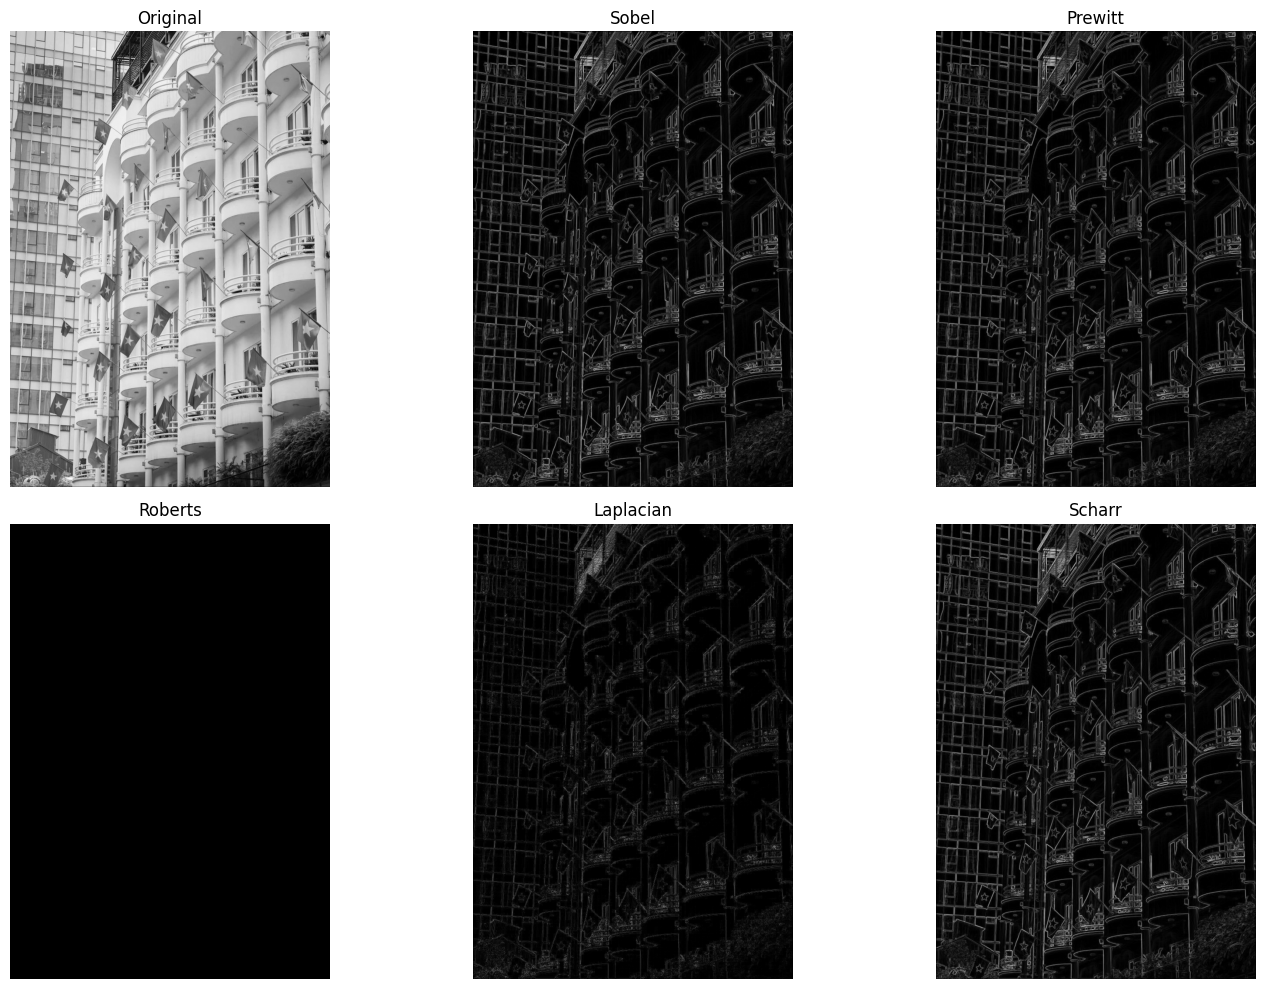

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img_path = 'img_to_ED.jpg'
img = mpimg.imread(img_path)

if img.ndim == 3:
    img_gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

edge_types = ['sobel', 'prewitt', 'roberts', 'laplacian', 'scharr']
images = [('Original', img_gray)]

for edge_type in edge_types:
    edges = edge_detection(img_gray, edge_type)
    images.append((edge_type.capitalize(), edges))

plt.figure(figsize=(15, 10))

for i, (title, image) in enumerate(images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


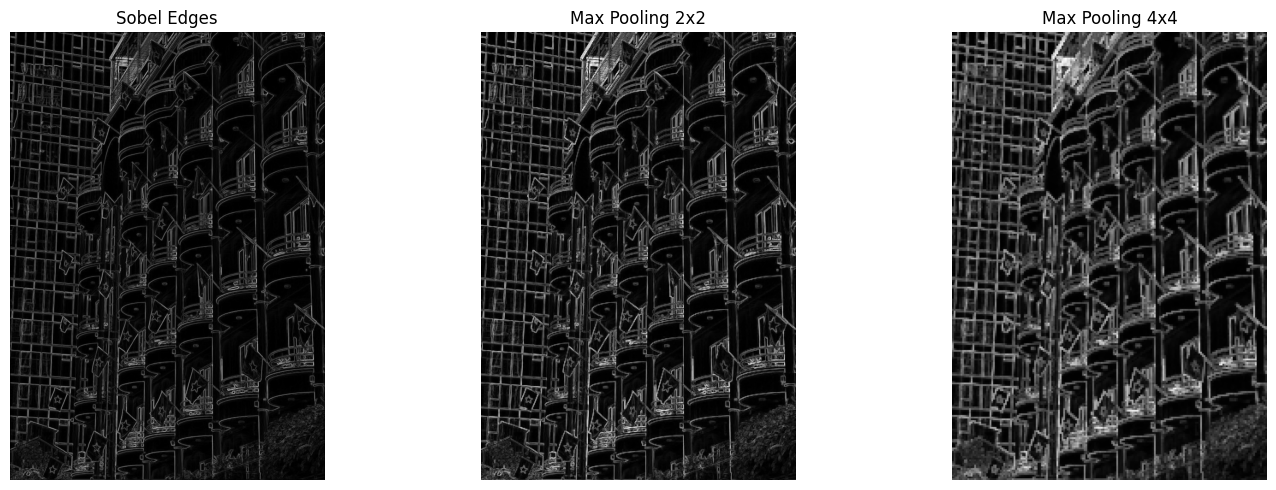

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def max_pooling(img, pool_size=2):
    h, w = img.shape
    h_out = h // pool_size
    w_out = w // pool_size
    pooled = np.zeros((h_out, w_out))

    for i in range(h_out):
        for j in range(w_out):
            patch = img[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            pooled[i, j] = np.max(patch)

    return pooled

sobel_image = images[1][1]
pooled_2x2 = max_pooling(sobel_image, 2)
pooled_4x4 = max_pooling(sobel_image, 4)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(pooled_2x2, cmap='gray')
plt.title('Max Pooling 2x2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pooled_4x4, cmap='gray')
plt.title('Max Pooling 4x4')
plt.axis('off')

plt.tight_layout()
plt.show()


# 1. Data preparation

In [ ]:
import numpy as np
import pickle
import os
import tarfile
from urllib.request import urlretrieve
from tqdm import tqdm

def load_cifar10(data_dir='cifar-10-batches-py'):
    if not os.path.exists(data_dir):
        url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
        urlretrieve(url, "cifar-10-python.tar.gz")
        with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
            tar.extractall()
    X_list, Y_list = [], []
    for i in range(1, 6):
        batch_file = os.path.join(data_dir, f"data_batch_{i}")
        with open(batch_file, "rb") as f:
            batch = pickle.load(f, encoding='bytes')
        data = batch[b'data'].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
        labels = np.array(batch[b'labels'])
        X_list.append(data)
        Y_list.append(labels)
    X_train = np.concatenate(X_list, axis=0)
    Y_train = np.concatenate(Y_list, axis=0)
    test_file = os.path.join(data_dir, 'test_batch')
    with open(test_file, "rb") as f:
        batch = pickle.load(f, encoding='bytes')
    X_test = batch[b'data'].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
    Y_test = np.array(batch[b'labels'])
    Y_train_oh = np.zeros((Y_train.shape[0], 10), dtype=np.float32)
    Y_train_oh[np.arange(Y_train.shape[0]), Y_train] = 1.0
    Y_test_oh = np.zeros((Y_test.shape[0], 10), dtype=np.float32)
    Y_test_oh[np.arange(Y_test.shape[0]), Y_test] = 1.0
    return X_train, Y_train_oh, X_test, Y_test_oh


# 2. Activation function


In [ ]:

def relu(Z):
    return np.maximum(0, Z)

def relu_back(dA, Z):
    dZ = dA.copy()
    dZ[Z <= 0] = 0
    return dZ

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=1, keepdims=True)


# 3. Conv layer class

In [ ]:
import numpy as np

class ConvLayer:
    def __init__(self, C_in, C_out, kernel_size, stride=1, padding=0):
        self.C_in = C_in
        self.C_out = C_out
        self.K = kernel_size
        self.stride = stride
        self.pad = padding
        scale = np.sqrt(2.0 / (C_in * kernel_size * kernel_size))
        self.W = np.random.randn(C_out, C_in, kernel_size, kernel_size).astype(np.float32) * scale
        self.b = np.zeros((C_out, 1), dtype=np.float32)
        self.cache = None
        self.mW, self.vW = np.zeros_like(self.W), np.zeros_like(self.W)
        self.mb, self.vb = np.zeros_like(self.b), np.zeros_like(self.b)

    def forward(self, X):
        N, C_in, H, W = X.shape
        pad, stride, K = self.pad, self.stride, self.K
        X_padded = np.pad(
            X,((0,0),(0,0),(pad,pad),(pad,pad)),
            mode='constant'
        )
        H_p, W_p = H + 2*pad, W + 2*pad
        H_out = (H_p - K)//stride + 1
        W_out = (W_p - K)//stride + 1
        shape = (N, C_in, K, K, H_out, W_out)
        strides = (
            X_padded.strides[0],
            X_padded.strides[1],
            X_padded.strides[2],
            X_padded.strides[3],
            stride * X_padded.strides[2],
            stride * X_padded.strides[3]
        )
        windows = np.lib.stride_tricks.as_strided(
            X_padded,
            shape=shape,
            strides=strides,
            writeable=False
        ) # im2col
        patches_col = windows.transpose(0,4,5,1,2,3).reshape(-1, C_in*K*K)
        # kernel đã được làm phẳng
        W_col = self.W.reshape(self.C_out, -1)
        out_col = patches_col.dot(W_col.T) + self.b.T
        out = out_col.reshape(N, H_out, W_out, self.C_out).transpose(0,3,1,2)
        self.cache = (X, X_padded, patches_col, H_out, W_out)
        return out

    def backward(self, d_out):
        X, X_padded, patches_col, H_out, W_out = self.cache
        N, C_in, H, W = X.shape
        C_out = self.C_out
        K, stride, pad = self.K, self.stride, self.pad
        d_out_col = d_out.transpose(0,2,3,1).reshape(-1, C_out)

        dW_col = d_out_col.T.dot(patches_col)
        dW = dW_col.reshape(C_out, C_in, K, K)

        db = np.sum(d_out_col, axis=0, keepdims=True).T

        W_col = self.W.reshape(C_out, -1)

        d_patches = d_out_col.dot(W_col)
        d_patches = d_patches.reshape(N, H_out, W_out, C_in, K, K)
        dX_padded = np.zeros((N, C_in, H+2*pad, W+2*pad), dtype=np.float32)
        for i in range(K):
            for j in range(K):
                dX_padded[:,:, i : i + H_out*stride : stride,
                                 j : j + W_out*stride : stride] += \
                    d_patches[:,:,:, :, i, j].transpose(0,3,1,2)
        if pad > 0:
            dX = dX_padded[:, :, pad:-pad, pad:-pad]
        else:
            dX = dX_padded
        return dX, dW, db


# 4. Max pooling layer

In [ ]:
import numpy as np

class MaxPoolingLayer:
    def __init__(self, pool_size, stride):
        self.P = pool_size
        self.stride = stride
        self.cache = None

    def forward(self, X):
        N, C, H, W = X.shape
        P, s = self.P, self.stride
        H_out = (H - P)//s + 1
        W_out = (W - P)//s + 1
        shape = (N, C, H_out, W_out, P, P)
        strides = (
            X.strides[0],
            X.strides[1],
            s * X.strides[2],
            s * X.strides[3],
            X.strides[2],
            X.strides[3]
        )
        windows = np.lib.stride_tricks.as_strided(
            X, shape=shape, strides=strides, writeable=False
        )
        out = windows.max(axis=(4,5))
        max_mask = (windows == out[:,:,:, :, None, None])
        self.cache = (X.shape, max_mask)
        return out

    def backward(self, d_out):
        X_shape, max_mask = self.cache
        N, C, H, W = X_shape
        P, s = self.P, self.stride
        _, _, H_out, W_out = d_out.shape
        dX = np.zeros(X_shape, dtype=np.float32)
        for i in range(P):
            for j in range(P):
                mask_slice = max_mask[:, :, :, :, i, j]
                dX[:, :, i : i + H_out*s : s,
                                 j : j + W_out*s : s] += mask_slice * d_out
        return dX


# 5. ANN layer

In [ ]:
import numpy as np
from tqdm import tqdm

class ANN:
    def __init__(self, conv_params):
        self.conv_layers = []
        C_in = 3
        H, W = 32, 32

        for p in conv_params:
            if p["type"] == "conv":
                layer = ConvLayer(C_in, p["C_out"], p["kernel"],
                                  stride=p.get("stride",1),
                                  padding=p.get("padding",0))
                self.conv_layers.append({"layer": layer,
                                         "activation": p.get("activation","relu")})
                H = (H + 2*p.get("padding",0) - p["kernel"]) // p.get("stride",1) + 1
                W = (W + 2*p.get("padding",0) - p["kernel"]) // p.get("stride",1) + 1
                C_in = p["C_out"]
            elif p["type"] == "pool":
                layer = MaxPoolingLayer(p["pool_size"], stride=p["stride"])
                self.conv_layers.append({"layer": layer, "activation": None})
                H = (H - p["pool_size"]) // p["stride"] + 1
                W = (W - p["pool_size"]) // p["stride"] + 1

        self.conv_1x1 = ConvLayer(C_in, 10, kernel_size=1, stride=1, padding=0)
        self.cache = {}
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.t = 0

    def forward(self, X):
        A = X
        conv_cache = []
        for idx, block in enumerate(self.conv_layers):
            layer = block["layer"]
            act = block["activation"]
            Z = layer.forward(A)
            if act == "relu":
                A = relu(Z)
            else:
                A = Z
            conv_cache.append((Z, A))
        Z1 = self.conv_1x1.forward(A)
        at = Z1.mean(axis=(2,3))
        self.cache['conv'] = conv_cache
        self.cache['A_after_conv'] = A
        self.cache['Z1'] = Z1
        return at

    def backward(self, logits, Y_true):
        N = Y_true.shape[0]
        P = softmax(logits)
        dL_dat = (P - Y_true) / N
        N_samples, N_channels, H1, W1 = self.cache['Z1'].shape
        dZ1 = dL_dat[:, :, np.newaxis, np.newaxis] / (H1 * W1)
        dZ1 = np.broadcast_to(dZ1, (N_samples, N_channels, H1, W1))
        A_prev = self.cache['A_after_conv']
        dA_conv, dW1, db1 = self.conv_1x1.backward(dZ1)
        conv_grads = []
        dA_current = dA_conv
        for i in reversed(range(len(self.conv_layers))):
            block = self.conv_layers[i]
            layer = block["layer"]
            act = block["activation"]
            Z, A = self.cache['conv'][i]
            if act == "relu":
                dZ = relu_back(dA_current, Z)
            else:
                dZ = dA_current
            if isinstance(layer, ConvLayer):
                dX, dW, db = layer.backward(dZ)
                conv_grads.insert(0, {"dW": dW, "db": db})
            else:
                dX = layer.backward(dZ)
                conv_grads.insert(0, None)
            dA_current = dX
        conv_grads.append({"dW": dW1, "db": db1})
        return conv_grads

    def update_weights(self, conv_grads, lr):
        self.t += 1
        lr_t = lr * np.sqrt(1 - self.beta2**self.t) / (1 - self.beta1**self.t)
        idx = 0
        for block in self.conv_layers:
            layer = block["layer"]
            grad = conv_grads[idx]
            if grad is not None:
                dW, db = grad["dW"], grad["db"]
                layer.mW = self.beta1 * layer.mW + (1 - self.beta1) * dW
                layer.vW = self.beta2 * layer.vW + (1 - self.beta2) * (dW**2)
                layer.W -= lr_t * layer.mW / (np.sqrt(layer.vW) + self.epsilon)
                layer.mb = self.beta1 * layer.mb + (1 - self.beta1) * db
                layer.vb = self.beta2 * layer.vb + (1 - self.beta2) * (db**2)
                layer.b -= lr_t * layer.mb / (np.sqrt(layer.vb) + self.epsilon)
            idx += 1
        grad1 = conv_grads[-1]
        dW1, db1 = grad1["dW"], grad1["db"]
        self.conv_1x1.mW = self.beta1 * self.conv_1x1.mW + (1 - self.beta1) * dW1
        self.conv_1x1.vW = self.beta2 * self.conv_1x1.vW + (1 - self.beta2) * (dW1**2)
        self.conv_1x1.W -= lr_t * self.conv_1x1.mW / (np.sqrt(self.conv_1x1.vW) + self.epsilon)
        self.conv_1x1.mb = self.beta1 * self.conv_1x1.mb + (1 - self.beta1) * db1
        self.conv_1x1.vb = self.beta2 * self.conv_1x1.vb + (1 - self.beta2) * (db1**2)
        self.conv_1x1.b -= lr_t * self.conv_1x1.mb / (np.sqrt(self.conv_1x1.vb) + self.epsilon)

    def score(self, X, Y):
        logits = self.forward(X)
        probs = softmax(logits)
        loss = -np.sum(Y * np.log(probs + 1e-8)) / X.shape[0]
        preds = np.argmax(probs, axis=1)
        labels = np.argmax(Y, axis=1)
        accuracy = np.sum(preds == labels) / X.shape[0]
        return loss, accuracy

    def evaluate(self, X, Y, dataset_name="Test"):
        loss, accuracy = self.score(X, Y)
        print(f"{dataset_name} Loss: {loss:.4f}, {dataset_name} Acc: {accuracy*100:.2f}%")
        return loss, accuracy

    def fit(self, X_train, Y_train, X_test, Y_test, epochs, batch_size, lr):
        train_loss_history = []
        train_acc_history = []
        test_loss_history = []
        test_acc_history = []

        for epoch in range(epochs):
            if X_train.shape[0] > batch_size:
                perm = np.random.permutation(X_train.shape[0])
                X_train = X_train[perm]
                Y_train = Y_train[perm]

            current_epoch_train_loss_sum = 0.0
            current_epoch_train_correct = 0
            current_epoch_train_total_samples = 0

            pbar = tqdm(range(0, X_train.shape[0], batch_size),
                        desc=f"Epoch {epoch+1}/{epochs} [Train]",
                        total=X_train.shape[0]//batch_size)
            for i in pbar:
                Xb = X_train[i:i+batch_size]
                Yb = Y_train[i:i+batch_size]

                logits = self.forward(Xb)
                probs = softmax(logits)

                loss = -np.sum(Yb * np.log(probs + 1e-8)) / Xb.shape[0]
                current_epoch_train_loss_sum += loss * Xb.shape[0]
                preds = np.argmax(probs, axis=1)
                labels = np.argmax(Yb, axis=1)
                current_epoch_train_correct += np.sum(preds == labels)
                current_epoch_train_total_samples += Xb.shape[0]

                conv_grads = self.backward(logits, Yb)
                self.update_weights(conv_grads, lr)

                pbar.set_postfix({
                    "loss": f"{current_epoch_train_loss_sum/current_epoch_train_total_samples:.4f}",
                    "acc": f"{(current_epoch_train_correct/current_epoch_train_total_samples)*100:.2f}%"
                })

            epoch_train_loss = current_epoch_train_loss_sum / current_epoch_train_total_samples
            epoch_train_acc = current_epoch_train_correct / current_epoch_train_total_samples
            train_loss_history.append(epoch_train_loss)
            train_acc_history.append(epoch_train_acc)

            log_parts = [f"Epoch {epoch+1},",
                         f"Train Loss: {epoch_train_loss:.4f},",
                         f"Train Acc: {epoch_train_acc*100:.2f}%"]

            if X_test.shape[0] > 0:
                epoch_test_loss, epoch_test_acc = self.evaluate(X_test, Y_test, dataset_name="Test")
                test_loss_history.append(epoch_test_loss)
                test_acc_history.append(epoch_test_acc)
                log_parts.append(f"Test Loss: {epoch_test_loss:.4f},")
                log_parts.append(f"Test Acc: {epoch_test_acc*100:.2f}%")
            else:
                test_loss_history.append(float('nan'))
                test_acc_history.append(float('nan'))

            print(" ".join(log_parts))

        return train_loss_history, train_acc_history, test_loss_history, test_acc_history


#6. Train

In [ ]:
import numpy as np

if __name__ == "__main__":
    X_train, Y_train, X_test, Y_test = load_cifar10()
    batch_size = 1024
    epochs = 100
    lr = 0.02

    print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")

    conv_params = [
        {"type": "conv", "C_out": 32, "kernel": 3, "padding": 1, "activation": "relu"},
        {"type": "pool", "pool_size": 2, "stride": 2},
        {"type": "conv", "C_out": 64, "kernel": 3, "padding": 1, "activation": "relu"},
        {"type": "pool", "pool_size": 2, "stride": 2},
    ]

    model = ANN(conv_params)

    train_loss_history, train_acc_history, test_loss_history, test_acc_history = \
        model.fit(X_train, Y_train, X_test, Y_test, epochs, batch_size, lr)

    print("\nTraining complete.")
    print("Final Training Metrics:")
    model.evaluate(X_train, Y_train, dataset_name="Train")
    print("Final Test Metrics:")
    model.evaluate(X_test, Y_test, dataset_name="Test")


X_train shape: (50000, 3, 32, 32), Y_train shape: (50000, 10)


Epoch 1/100 [Train]: 49it [06:00,  7.36s/it, loss=2.1855, acc=19.61%]


Epoch 1, Train Loss: 2.1855, Train Acc: 19.61% Test Loss: 1.9516, Test Acc: 27.46%


Epoch 2/100 [Train]: 49it [05:59,  7.33s/it, loss=1.8595, acc=30.95%]


Epoch 2, Train Loss: 1.8595, Train Acc: 30.95% Test Loss: 1.8200, Test Acc: 32.56%


Epoch 3/100 [Train]: 49it [05:57,  7.29s/it, loss=1.7318, acc=36.10%]


Epoch 3, Train Loss: 1.7318, Train Acc: 36.10% Test Loss: 1.6471, Test Acc: 39.69%


Epoch 4/100 [Train]: 49it [06:00,  7.36s/it, loss=1.6376, acc=40.80%]


Epoch 4, Train Loss: 1.6376, Train Acc: 40.80% Test Loss: 1.5761, Test Acc: 43.38%


Epoch 5/100 [Train]: 49it [05:59,  7.35s/it, loss=1.5539, acc=44.19%]


Epoch 5, Train Loss: 1.5539, Train Acc: 44.19% Test Loss: 1.5205, Test Acc: 44.98%


Epoch 6/100 [Train]: 49it [05:59,  7.33s/it, loss=1.5134, acc=45.65%]


Epoch 6, Train Loss: 1.5134, Train Acc: 45.65% Test Loss: 1.5004, Test Acc: 46.26%


Epoch 7/100 [Train]: 49it [06:03,  7.43s/it, loss=1.4517, acc=48.23%]


Epoch 7, Train Loss: 1.4517, Train Acc: 48.23% Test Loss: 1.4196, Test Acc: 49.19%


Epoch 8/100 [Train]: 49it [05:58,  7.32s/it, loss=1.4335, acc=48.99%]


Epoch 8, Train Loss: 1.4335, Train Acc: 48.99% Test Loss: 1.4112, Test Acc: 49.55%


Epoch 9/100 [Train]: 49it [05:58,  7.32s/it, loss=1.3855, acc=50.61%]


Epoch 9, Train Loss: 1.3855, Train Acc: 50.61% Test Loss: 1.4096, Test Acc: 49.01%


Epoch 10/100 [Train]: 49it [05:55,  7.27s/it, loss=1.3956, acc=50.27%]


Epoch 10, Train Loss: 1.3956, Train Acc: 50.27% Test Loss: 1.3781, Test Acc: 49.82%


Epoch 11/100 [Train]: 49it [05:52,  7.20s/it, loss=1.3377, acc=52.28%]


Epoch 11, Train Loss: 1.3377, Train Acc: 52.28% Test Loss: 1.3620, Test Acc: 50.69%


Epoch 12/100 [Train]: 49it [05:55,  7.26s/it, loss=1.3047, acc=53.80%]


Epoch 12, Train Loss: 1.3047, Train Acc: 53.80% Test Loss: 1.3098, Test Acc: 53.13%


Epoch 13/100 [Train]: 49it [05:52,  7.18s/it, loss=1.2946, acc=54.24%]


Epoch 13, Train Loss: 1.2946, Train Acc: 54.24% Test Loss: 1.2947, Test Acc: 53.13%


Epoch 14/100 [Train]: 49it [05:56,  7.28s/it, loss=1.2775, acc=54.57%]


Epoch 14, Train Loss: 1.2775, Train Acc: 54.57% Test Loss: 1.2912, Test Acc: 53.07%


Epoch 15/100 [Train]: 49it [05:54,  7.24s/it, loss=1.2654, acc=55.07%]


Epoch 15, Train Loss: 1.2654, Train Acc: 55.07% Test Loss: 1.2835, Test Acc: 53.64%


Epoch 16/100 [Train]: 49it [05:54,  7.24s/it, loss=1.2425, acc=56.27%]


Epoch 16, Train Loss: 1.2425, Train Acc: 56.27% Test Loss: 1.2726, Test Acc: 54.27%


Epoch 17/100 [Train]: 49it [05:53,  7.21s/it, loss=1.2306, acc=56.82%]


Epoch 17, Train Loss: 1.2306, Train Acc: 56.82% Test Loss: 1.2408, Test Acc: 55.58%


Epoch 18/100 [Train]: 49it [05:55,  7.25s/it, loss=1.2282, acc=56.72%]


Epoch 18, Train Loss: 1.2282, Train Acc: 56.72% Test Loss: 1.2490, Test Acc: 55.61%


Epoch 19/100 [Train]: 49it [05:53,  7.21s/it, loss=1.2127, acc=57.34%]


Epoch 19, Train Loss: 1.2127, Train Acc: 57.34% Test Loss: 1.2773, Test Acc: 54.20%


Epoch 20/100 [Train]: 49it [05:55,  7.26s/it, loss=1.2032, acc=57.54%]


Epoch 20, Train Loss: 1.2032, Train Acc: 57.54% Test Loss: 1.2203, Test Acc: 56.10%


Epoch 21/100 [Train]: 49it [05:57,  7.29s/it, loss=1.1832, acc=58.46%]


Epoch 21, Train Loss: 1.1832, Train Acc: 58.46% Test Loss: 1.2052, Test Acc: 57.12%


Epoch 22/100 [Train]: 49it [05:52,  7.20s/it, loss=1.1761, acc=58.48%]


Epoch 22, Train Loss: 1.1761, Train Acc: 58.48% Test Loss: 1.1971, Test Acc: 57.18%


Epoch 23/100 [Train]: 49it [05:53,  7.21s/it, loss=1.1614, acc=59.01%]


Epoch 23, Train Loss: 1.1614, Train Acc: 59.01% Test Loss: 1.1994, Test Acc: 56.84%


Epoch 24/100 [Train]: 49it [05:58,  7.32s/it, loss=1.1539, acc=59.45%]


Epoch 24, Train Loss: 1.1539, Train Acc: 59.45% Test Loss: 1.1829, Test Acc: 57.95%


Epoch 25/100 [Train]: 49it [05:56,  7.27s/it, loss=1.1621, acc=59.29%]


Epoch 25, Train Loss: 1.1621, Train Acc: 59.29% Test Loss: 1.1763, Test Acc: 57.95%


Epoch 26/100 [Train]: 49it [05:56,  7.28s/it, loss=1.1565, acc=59.19%]


Epoch 26, Train Loss: 1.1565, Train Acc: 59.19% Test Loss: 1.1912, Test Acc: 57.79%


Epoch 27/100 [Train]: 49it [05:55,  7.26s/it, loss=1.1368, acc=59.99%]


Epoch 27, Train Loss: 1.1368, Train Acc: 59.99% Test Loss: 1.1765, Test Acc: 57.88%


Epoch 28/100 [Train]: 49it [05:53,  7.22s/it, loss=1.1282, acc=60.24%]


Epoch 28, Train Loss: 1.1282, Train Acc: 60.24% Test Loss: 1.2129, Test Acc: 56.61%


Epoch 29/100 [Train]: 49it [05:51,  7.17s/it, loss=1.1307, acc=60.03%]


Epoch 29, Train Loss: 1.1307, Train Acc: 60.03% Test Loss: 1.1488, Test Acc: 58.97%


Epoch 30/100 [Train]: 49it [05:53,  7.21s/it, loss=1.1042, acc=61.17%]


Epoch 30, Train Loss: 1.1042, Train Acc: 61.17% Test Loss: 1.1456, Test Acc: 59.35%


Epoch 31/100 [Train]: 49it [05:54,  7.24s/it, loss=1.1015, acc=61.33%]


Epoch 31, Train Loss: 1.1015, Train Acc: 61.33% Test Loss: 1.1403, Test Acc: 59.25%


Epoch 32/100 [Train]: 49it [05:55,  7.25s/it, loss=1.0976, acc=61.27%]


Epoch 32, Train Loss: 1.0976, Train Acc: 61.27% Test Loss: 1.1307, Test Acc: 59.28%


Epoch 33/100 [Train]: 49it [05:55,  7.25s/it, loss=1.0909, acc=61.52%]


Epoch 33, Train Loss: 1.0909, Train Acc: 61.52% Test Loss: 1.1059, Test Acc: 60.40%


Epoch 34/100 [Train]: 49it [05:59,  7.34s/it, loss=1.0801, acc=62.04%]


Epoch 34, Train Loss: 1.0801, Train Acc: 62.04% Test Loss: 1.1152, Test Acc: 60.58%


Epoch 35/100 [Train]: 49it [06:00,  7.36s/it, loss=1.0826, acc=61.94%]


Epoch 35, Train Loss: 1.0826, Train Acc: 61.94% Test Loss: 1.1180, Test Acc: 59.82%


Epoch 36/100 [Train]: 49it [06:02,  7.40s/it, loss=1.0775, acc=62.03%]


Epoch 36, Train Loss: 1.0775, Train Acc: 62.03% Test Loss: 1.0996, Test Acc: 60.48%


Epoch 37/100 [Train]: 49it [05:59,  7.33s/it, loss=1.0695, acc=62.24%]


Epoch 37, Train Loss: 1.0695, Train Acc: 62.24% Test Loss: 1.0991, Test Acc: 60.96%


Epoch 38/100 [Train]: 49it [06:04,  7.45s/it, loss=1.0639, acc=62.66%]


Epoch 38, Train Loss: 1.0639, Train Acc: 62.66% Test Loss: 1.0913, Test Acc: 60.78%


Epoch 39/100 [Train]: 49it [06:01,  7.37s/it, loss=1.0536, acc=62.90%]


Epoch 39, Train Loss: 1.0536, Train Acc: 62.90% Test Loss: 1.1031, Test Acc: 60.57%


Epoch 40/100 [Train]: 49it [05:56,  7.27s/it, loss=1.0451, acc=63.25%]


Epoch 40, Train Loss: 1.0451, Train Acc: 63.25% Test Loss: 1.0872, Test Acc: 61.10%


Epoch 41/100 [Train]: 49it [06:00,  7.36s/it, loss=1.0340, acc=63.80%]


Epoch 41, Train Loss: 1.0340, Train Acc: 63.80% Test Loss: 1.0878, Test Acc: 61.06%


Epoch 42/100 [Train]: 49it [05:57,  7.30s/it, loss=1.0361, acc=63.43%]


Epoch 42, Train Loss: 1.0361, Train Acc: 63.43% Test Loss: 1.0720, Test Acc: 62.15%


Epoch 43/100 [Train]: 49it [05:59,  7.33s/it, loss=1.0242, acc=64.05%]


Epoch 43, Train Loss: 1.0242, Train Acc: 64.05% Test Loss: 1.1070, Test Acc: 61.34%


Epoch 44/100 [Train]: 49it [05:58,  7.33s/it, loss=1.0233, acc=63.65%]


Epoch 44, Train Loss: 1.0233, Train Acc: 63.65% Test Loss: 1.0906, Test Acc: 60.97%


Epoch 45/100 [Train]: 49it [05:55,  7.25s/it, loss=1.0361, acc=63.35%]


Epoch 45, Train Loss: 1.0361, Train Acc: 63.35% Test Loss: 1.0571, Test Acc: 62.66%


Epoch 46/100 [Train]: 49it [05:59,  7.33s/it, loss=1.0159, acc=64.05%]


Epoch 46, Train Loss: 1.0159, Train Acc: 64.05% Test Loss: 1.0682, Test Acc: 62.36%


Epoch 47/100 [Train]: 49it [06:01,  7.38s/it, loss=1.0145, acc=64.05%]


Epoch 47, Train Loss: 1.0145, Train Acc: 64.05% Test Loss: 1.0392, Test Acc: 62.84%


Epoch 48/100 [Train]: 49it [05:57,  7.29s/it, loss=0.9895, acc=65.28%]


Epoch 48, Train Loss: 0.9895, Train Acc: 65.28% Test Loss: 1.0834, Test Acc: 61.56%


Epoch 49/100 [Train]: 49it [05:59,  7.33s/it, loss=0.9979, acc=64.94%]


Epoch 49, Train Loss: 0.9979, Train Acc: 64.94% Test Loss: 1.0570, Test Acc: 62.97%


Epoch 50/100 [Train]: 49it [05:55,  7.26s/it, loss=1.0005, acc=64.89%]


Epoch 50, Train Loss: 1.0005, Train Acc: 64.89% Test Loss: 1.0806, Test Acc: 61.66%


Epoch 51/100 [Train]: 49it [05:55,  7.26s/it, loss=1.0013, acc=64.67%]


Epoch 51, Train Loss: 1.0013, Train Acc: 64.67% Test Loss: 1.1109, Test Acc: 61.04%


Epoch 52/100 [Train]: 49it [05:58,  7.32s/it, loss=1.0025, acc=64.68%]


Epoch 52, Train Loss: 1.0025, Train Acc: 64.68% Test Loss: 1.0377, Test Acc: 63.39%


Epoch 53/100 [Train]: 49it [06:06,  7.49s/it, loss=0.9936, acc=65.05%]


Epoch 53, Train Loss: 0.9936, Train Acc: 65.05% Test Loss: 1.0615, Test Acc: 62.51%


Epoch 54/100 [Train]: 49it [05:59,  7.34s/it, loss=0.9848, acc=65.29%]


Epoch 54, Train Loss: 0.9848, Train Acc: 65.29% Test Loss: 1.0393, Test Acc: 63.84%


Epoch 55/100 [Train]: 49it [06:00,  7.36s/it, loss=0.9899, acc=65.03%]


Epoch 55, Train Loss: 0.9899, Train Acc: 65.03% Test Loss: 1.1391, Test Acc: 60.77%


Epoch 56/100 [Train]: 49it [05:55,  7.26s/it, loss=0.9808, acc=65.41%]


Epoch 56, Train Loss: 0.9808, Train Acc: 65.41% Test Loss: 1.0343, Test Acc: 63.66%


Epoch 57/100 [Train]: 49it [06:03,  7.41s/it, loss=0.9793, acc=65.57%]


Epoch 57, Train Loss: 0.9793, Train Acc: 65.57% Test Loss: 1.0510, Test Acc: 62.89%


Epoch 58/100 [Train]: 49it [06:04,  7.44s/it, loss=0.9695, acc=65.74%]


Epoch 58, Train Loss: 0.9695, Train Acc: 65.74% Test Loss: 1.0619, Test Acc: 63.21%


Epoch 59/100 [Train]: 49it [05:57,  7.29s/it, loss=0.9664, acc=66.03%]


Epoch 59, Train Loss: 0.9664, Train Acc: 66.03% Test Loss: 1.0363, Test Acc: 63.86%


Epoch 60/100 [Train]: 49it [05:56,  7.27s/it, loss=0.9537, acc=66.47%]


Epoch 60, Train Loss: 0.9537, Train Acc: 66.47% Test Loss: 1.0810, Test Acc: 61.87%


Epoch 61/100 [Train]: 49it [06:00,  7.36s/it, loss=0.9728, acc=65.59%]


Epoch 61, Train Loss: 0.9728, Train Acc: 65.59% Test Loss: 1.0453, Test Acc: 63.23%


Epoch 62/100 [Train]: 49it [05:58,  7.32s/it, loss=0.9462, acc=66.70%]


Epoch 62, Train Loss: 0.9462, Train Acc: 66.70% Test Loss: 1.0460, Test Acc: 62.82%


Epoch 63/100 [Train]: 49it [06:02,  7.39s/it, loss=0.9553, acc=66.39%]


Epoch 63, Train Loss: 0.9553, Train Acc: 66.39% Test Loss: 1.0223, Test Acc: 63.86%


Epoch 64/100 [Train]: 49it [05:58,  7.31s/it, loss=0.9496, acc=66.42%]


Epoch 64, Train Loss: 0.9496, Train Acc: 66.42% Test Loss: 1.0557, Test Acc: 62.81%


Epoch 65/100 [Train]: 49it [05:55,  7.26s/it, loss=0.9557, acc=66.38%]


Epoch 65, Train Loss: 0.9557, Train Acc: 66.38% Test Loss: 1.0768, Test Acc: 62.19%


Epoch 66/100 [Train]: 49it [06:01,  7.37s/it, loss=0.9457, acc=66.72%]


Epoch 66, Train Loss: 0.9457, Train Acc: 66.72% Test Loss: 1.0307, Test Acc: 63.97%


Epoch 67/100 [Train]: 49it [05:57,  7.29s/it, loss=0.9245, acc=67.48%]


Epoch 67, Train Loss: 0.9245, Train Acc: 67.48% Test Loss: 1.0342, Test Acc: 62.37%


Epoch 68/100 [Train]: 49it [05:59,  7.33s/it, loss=0.9257, acc=67.36%]


Epoch 68, Train Loss: 0.9257, Train Acc: 67.36% Test Loss: 1.0400, Test Acc: 63.09%


Epoch 69/100 [Train]: 49it [06:14,  7.65s/it, loss=0.9353, acc=66.97%]


Epoch 69, Train Loss: 0.9353, Train Acc: 66.97% Test Loss: 1.0075, Test Acc: 64.55%


Epoch 70/100 [Train]: 49it [06:04,  7.44s/it, loss=0.9322, acc=67.17%]


Epoch 70, Train Loss: 0.9322, Train Acc: 67.17% Test Loss: 1.0205, Test Acc: 63.69%


Epoch 71/100 [Train]: 49it [06:01,  7.37s/it, loss=0.9302, acc=67.20%]


Epoch 71, Train Loss: 0.9302, Train Acc: 67.20% Test Loss: 1.0572, Test Acc: 62.71%


Epoch 72/100 [Train]: 49it [06:02,  7.40s/it, loss=0.9461, acc=66.71%]


Epoch 72, Train Loss: 0.9461, Train Acc: 66.71% Test Loss: 1.0413, Test Acc: 63.36%


Epoch 73/100 [Train]: 49it [06:02,  7.39s/it, loss=0.9265, acc=67.62%]


Epoch 73, Train Loss: 0.9265, Train Acc: 67.62% Test Loss: 1.0201, Test Acc: 64.68%


Epoch 74/100 [Train]: 49it [06:02,  7.40s/it, loss=0.9166, acc=67.77%]


Epoch 74, Train Loss: 0.9166, Train Acc: 67.77% Test Loss: 1.0040, Test Acc: 64.49%


Epoch 75/100 [Train]: 49it [06:00,  7.36s/it, loss=0.9117, acc=67.97%]


Epoch 75, Train Loss: 0.9117, Train Acc: 67.97% Test Loss: 1.0125, Test Acc: 64.76%


Epoch 76/100 [Train]: 49it [06:02,  7.39s/it, loss=0.9060, acc=68.04%]


Epoch 76, Train Loss: 0.9060, Train Acc: 68.04% Test Loss: 1.0123, Test Acc: 64.38%


Epoch 77/100 [Train]: 49it [06:06,  7.48s/it, loss=0.9078, acc=68.01%]


Epoch 77, Train Loss: 0.9078, Train Acc: 68.01% Test Loss: 1.0249, Test Acc: 63.52%


Epoch 78/100 [Train]: 49it [06:00,  7.36s/it, loss=0.9070, acc=68.00%]


Epoch 78, Train Loss: 0.9070, Train Acc: 68.00% Test Loss: 1.0095, Test Acc: 64.40%


Epoch 79/100 [Train]: 49it [06:02,  7.41s/it, loss=0.9012, acc=68.21%]


Epoch 79, Train Loss: 0.9012, Train Acc: 68.21% Test Loss: 1.0224, Test Acc: 64.08%


Epoch 80/100 [Train]: 49it [06:02,  7.40s/it, loss=0.9003, acc=68.28%]


Epoch 80, Train Loss: 0.9003, Train Acc: 68.28% Test Loss: 0.9826, Test Acc: 65.58%


Epoch 81/100 [Train]: 49it [06:02,  7.39s/it, loss=0.9043, acc=67.96%]


Epoch 81, Train Loss: 0.9043, Train Acc: 67.96% Test Loss: 1.0636, Test Acc: 62.97%


Epoch 82/100 [Train]: 49it [06:04,  7.44s/it, loss=0.9120, acc=67.87%]


Epoch 82, Train Loss: 0.9120, Train Acc: 67.87% Test Loss: 1.0043, Test Acc: 64.92%


Epoch 83/100 [Train]: 49it [06:02,  7.41s/it, loss=0.9047, acc=68.10%]


Epoch 83, Train Loss: 0.9047, Train Acc: 68.10% Test Loss: 1.0212, Test Acc: 63.64%


Epoch 84/100 [Train]: 49it [06:01,  7.37s/it, loss=0.8870, acc=68.71%]


Epoch 84, Train Loss: 0.8870, Train Acc: 68.71% Test Loss: 1.0186, Test Acc: 64.00%


Epoch 85/100 [Train]: 49it [05:57,  7.30s/it, loss=0.8977, acc=68.39%]


Epoch 85, Train Loss: 0.8977, Train Acc: 68.39% Test Loss: 1.0318, Test Acc: 63.01%


Epoch 86/100 [Train]: 49it [06:02,  7.40s/it, loss=0.8991, acc=68.20%]


Epoch 86, Train Loss: 0.8991, Train Acc: 68.20% Test Loss: 0.9884, Test Acc: 64.92%


Epoch 87/100 [Train]: 49it [05:58,  7.32s/it, loss=0.8988, acc=68.23%]


Epoch 87, Train Loss: 0.8988, Train Acc: 68.23% Test Loss: 1.0075, Test Acc: 64.10%


Epoch 88/100 [Train]: 49it [05:58,  7.31s/it, loss=0.8894, acc=68.79%]


Epoch 88, Train Loss: 0.8894, Train Acc: 68.79% Test Loss: 0.9933, Test Acc: 65.05%


Epoch 89/100 [Train]: 49it [05:56,  7.28s/it, loss=0.8791, acc=69.00%]


Epoch 89, Train Loss: 0.8791, Train Acc: 69.00% Test Loss: 1.0089, Test Acc: 64.70%


Epoch 90/100 [Train]: 49it [06:01,  7.38s/it, loss=0.8960, acc=68.51%]


Epoch 90, Train Loss: 0.8960, Train Acc: 68.51% Test Loss: 0.9917, Test Acc: 65.01%


Epoch 91/100 [Train]: 49it [06:02,  7.40s/it, loss=0.8915, acc=68.73%]


Epoch 91, Train Loss: 0.8915, Train Acc: 68.73% Test Loss: 1.0207, Test Acc: 63.95%


Epoch 92/100 [Train]: 49it [06:05,  7.45s/it, loss=0.8876, acc=68.77%]


Epoch 92, Train Loss: 0.8876, Train Acc: 68.77% Test Loss: 1.0051, Test Acc: 64.58%


Epoch 93/100 [Train]: 49it [06:01,  7.37s/it, loss=0.8807, acc=69.01%]


Epoch 93, Train Loss: 0.8807, Train Acc: 69.01% Test Loss: 0.9988, Test Acc: 65.12%


Epoch 94/100 [Train]: 49it [06:03,  7.41s/it, loss=0.8823, acc=68.78%]


Epoch 94, Train Loss: 0.8823, Train Acc: 68.78% Test Loss: 1.0119, Test Acc: 64.74%


Epoch 95/100 [Train]: 49it [05:53,  7.22s/it, loss=0.8774, acc=69.07%]


Epoch 95, Train Loss: 0.8774, Train Acc: 69.07% Test Loss: 1.0026, Test Acc: 64.81%


Epoch 96/100 [Train]: 49it [06:02,  7.39s/it, loss=0.8860, acc=68.92%]


Epoch 96, Train Loss: 0.8860, Train Acc: 68.92% Test Loss: 0.9999, Test Acc: 64.87%


Epoch 97/100 [Train]: 49it [05:58,  7.32s/it, loss=0.8968, acc=68.24%]


Epoch 97, Train Loss: 0.8968, Train Acc: 68.24% Test Loss: 1.0209, Test Acc: 64.07%


Epoch 98/100 [Train]:  52%|█████▏    | 25/48 [03:03<02:43,  7.12s/it, loss=0.8756, acc=69.10%]

In [ ]:
# cnn_from_scratch.py

# =============================================================================
# 1. IMPORTS & SETUP
# =============================================================================
import numpy as np
import pickle
import os
import tarfile
from urllib.request import urlretrieve
from tqdm import tqdm
import time

# =============================================================================
# 2. DATA LOADING & PREPARATION
# =============================================================================

def load_cifar10(data_dir='cifar-10-batches-py'):
    """
    Loads and prepares the CIFAR-10 dataset.
    Downloads the data if it doesn't exist.
    """
    if not os.path.exists(data_dir):
        print("Downloading CIFAR-10 dataset...")
        url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
        urlretrieve(url, "cifar-10-python.tar.gz")
        with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
            tar.extractall()
        print("Download complete.")

    X_list, Y_list = [], []
    for i in range(1, 6):
        batch_file = os.path.join(data_dir, f"data_batch_{i}")
        with open(batch_file, "rb") as f:
            batch = pickle.load(f, encoding='bytes')
        # Reshape to (N, C, H, W) and normalize
        data = batch[b'data'].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
        labels = np.array(batch[b'labels'])
        X_list.append(data)
        Y_list.append(labels)

    X_train = np.concatenate(X_list, axis=0)
    Y_train = np.concatenate(Y_list, axis=0)

    test_file = os.path.join(data_dir, 'test_batch')
    with open(test_file, "rb") as f:
        batch = pickle.load(f, encoding='bytes')
    X_test = batch[b'data'].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
    Y_test = np.array(batch[b'labels'])

    # One-hot encode labels
    Y_train_oh = np.zeros((Y_train.shape[0], 10), dtype=np.float32)
    Y_train_oh[np.arange(Y_train.shape[0]), Y_train] = 1.0
    Y_test_oh = np.zeros((Y_test.shape[0], 10), dtype=np.float32)
    Y_test_oh[np.arange(Y_test.shape[0]), Y_test] = 1.0

    return X_train, Y_train_oh, X_test, Y_test_oh

# =============================================================================
# 3. HELPER FUNCTIONS (Activations, Schedulers, Augmentation)
# =============================================================================

def softmax(Z):
    """Numerically stable softmax function."""
    Z_shift = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def next_batch(X, Y, batch_size):
    """Yields mini-batches of data."""
    for i in range(0, X.shape[0], batch_size):
        yield X[i:i+batch_size], Y[i:i+batch_size]

def augment_batch(X_batch):
    """Applies simple data augmentation: random flips and shifts."""
    augmented_X = X_batch.copy()

    # 1. Random Horizontal Flips
    for i in range(X_batch.shape[0]):
        if np.random.rand() > 0.5:
            augmented_X[i] = augmented_X[i, :, :, ::-1]

    # 2. Random Shifts (padding and cropping)
    pad = 4
    padded_X = np.pad(augmented_X, ((0,0), (0,0), (pad,pad), (pad,pad)), mode='constant')
    for i in range(X_batch.shape[0]):
        h_start = np.random.randint(0, 2 * pad)
        w_start = np.random.randint(0, 2 * pad)
        augmented_X[i] = padded_X[i, :, h_start:h_start+32, w_start:w_start+32]

    return augmented_X

def learning_rate_scheduler(initial_lr, epoch, decay_rate=0.9, decay_epochs=1):
    """Decays the learning rate by a factor of decay_rate every decay_epochs."""
    return initial_lr * (decay_rate ** (epoch // decay_epochs))


# =============================================================================
# 4. LAYER DEFINITIONS
# =============================================================================

class ConvLayer:
    def __init__(self, C_in, C_out, kernel_size, stride=1, padding=0):
        self.C_in = C_in
        self.C_out = C_out
        self.K = kernel_size
        self.stride = stride
        self.pad = padding
        scale = np.sqrt(2.0 / (C_in * kernel_size * kernel_size))
        self.W = np.random.randn(C_out, C_in, kernel_size, kernel_size).astype(np.float32) * scale
        self.b = np.zeros((C_out, 1), dtype=np.float32)
        self.cache = None
        self.mW, self.vW = np.zeros_like(self.W), np.zeros_like(self.W)
        self.mb, self.vb = np.zeros_like(self.b), np.zeros_like(self.b)

    def forward(self, X):
        N, C_in, H, W = X.shape
        pad, stride, K = self.pad, self.stride, self.K
        X_padded = np.pad(X, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
        H_p, W_p = H + 2 * pad, W + 2 * pad
        H_out = (H_p - K) // stride + 1
        W_out = (W_p - K) // stride + 1

        # Using as_strided for efficient im2col
        shape = (N, C_in, K, K, H_out, W_out)
        strides = (X_padded.strides[0], X_padded.strides[1], X_padded.strides[2], X_padded.strides[3],
                   stride * X_padded.strides[2], stride * X_padded.strides[3])
        windows = np.lib.stride_tricks.as_strided(X_padded, shape=shape, strides=strides, writeable=False)

        patches_col = windows.transpose(0, 4, 5, 1, 2, 3).reshape(-1, C_in * K * K)
        W_col = self.W.reshape(self.C_out, -1)
        out_col = patches_col.dot(W_col.T) + self.b.T
        out = out_col.reshape(N, H_out, W_out, self.C_out).transpose(0, 3, 1, 2)

        self.cache = (X, patches_col)
        return out

    def backward(self, d_out):
        X, patches_col = self.cache
        N, C_in, H, W = X.shape
        C_out, _, K, _ = self.W.shape
        stride, pad = self.stride, self.pad

        d_out_col = d_out.transpose(0, 2, 3, 1).reshape(-1, C_out)

        dW_col = d_out_col.T.dot(patches_col)
        self.dW = dW_col.reshape(self.W.shape)
        self.db = np.sum(d_out_col, axis=0, keepdims=True).T

        W_col = self.W.reshape(C_out, -1)
        d_patches = d_out_col.dot(W_col)
        d_patches = d_patches.reshape(N, d_out.shape[2], d_out.shape[3], C_in, K, K)

        # This is a col2im operation
        dX_padded = np.zeros((N, C_in, H + 2 * pad, W + 2 * pad), dtype=np.float32)
        for i in range(K):
            for j in range(K):
                dX_padded[:, :, i::stride, j::stride][:,:,:d_out.shape[2],:d_out.shape[3]] += \
                    d_patches[:, :, :, :, i, j].transpose(0, 3, 1, 2)

        if pad > 0:
            dX = dX_padded[:, :, pad:-pad, pad:-pad]
        else:
            dX = dX_padded

        return dX

class MaxPoolingLayer:
    def __init__(self, pool_size, stride):
        self.P = pool_size
        self.stride = stride
        self.cache = None

    def forward(self, X):
        N, C, H, W = X.shape
        P, s = self.P, self.stride
        H_out = (H - P) // s + 1
        W_out = (W - P) // s + 1

        shape = (N, C, H_out, W_out, P, P)
        strides = (X.strides[0], X.strides[1], s * X.strides[2], s * X.strides[3], X.strides[2], X.strides[3])
        windows = np.lib.stride_tricks.as_strided(X, shape=shape, strides=strides, writeable=False)

        out = windows.max(axis=(4, 5))
        max_mask = (windows == out[:, :, :, :, None, None])
        self.cache = (X.shape, max_mask)
        return out

    def backward(self, d_out):
        X_shape, max_mask = self.cache
        N, C, H, W = X_shape
        P, s = self.P, self.stride

        dX = np.zeros(X_shape, dtype=np.float32)

        # Expand d_out to match the dimensions of the mask/windows
        # It needs to be (N, C, H_out, W_out, P, P)
        # d_out has shape (N, C, H_out, W_out)
        d_out_expanded = d_out[:, :, :, :, np.newaxis, np.newaxis]
        d_out_expanded = np.broadcast_to(d_out_expanded, max_mask.shape)


        # Distribute gradient to max values
        dX_windows = np.zeros_like(max_mask, dtype=np.float32)
        dX_windows[max_mask] = d_out_expanded[max_mask] # This line was causing the error

        # Reshape dX_windows back to the original shape (N, C, H, W)
        # This col2im operation needs to distribute the gradients from the windows
        # back to the original input locations.

        # A more efficient approach is to iterate through the original input
        # and add the gradient where the max was.
        # Let's try the original loop but with the correctly masked gradients.
        # The previous implementation of the loop seems correct for scattering gradients.
        # Let's ensure dX_windows is correctly populated first.

        # The issue might be how dX is being updated.
        # The original code was summing contributions from different window positions.
        # Let's stick to scattering the gradient using the mask directly onto the output gradient.

        # Efficient scatter using the mask
        # Create a tensor the shape of the original input
        dX = np.zeros(X_shape, dtype=np.float32)

        # Iterate over the output dimensions (H_out, W_out) and pool dimensions (P, P)
        # to scatter the gradients from d_out to the corresponding locations in dX.
        for i in range(d_out.shape[2]): # Iterate over H_out
            for j in range(d_out.shape[3]): # Iterate over W_out
                # Get the window in the original input that contributed to this output location
                h_start = i * s
                w_start = j * s
                h_end = h_start + P
                w_end = w_start + P

                # Get the gradient for this output location
                grad_out_patch = d_out[:, :, i, j][:, :, np.newaxis, np.newaxis] # Shape (N, C, 1, 1)

                # Get the mask for this output location's window
                mask_patch = max_mask[:, :, i, j, :, :] # Shape (N, C, P, P)

                # Distribute the gradient only to the locations where the max was found
                # Need to broadcast the gradient to the shape of the mask patch
                grad_out_patch_broadcast = np.broadcast_to(grad_out_patch, mask_patch.shape)

                # Add the gradient to the corresponding slice in dX, only where the mask is True
                dX[:, :, h_start:h_end, w_start:w_end][mask_patch] += grad_out_patch_broadcast[mask_patch]


        return dX


class ReLULayer:
    def __init__(self):
        self.cache = None

    def forward(self, Z):
        self.cache = Z
        return np.maximum(0, Z)

    def backward(self, dA):
        Z = self.cache
        dZ = dA.copy()
        dZ[Z <= 0] = 0
        return dZ

class FlattenLayer:
    def __init__(self):
        self.cache = None

    def forward(self, X):
        self.cache = X.shape
        N, C, H, W = X.shape
        return X.reshape(N, -1)

    def backward(self, d_out):
        return d_out.reshape(self.cache)

class DenseLayer:
    def __init__(self, D_in, D_out):
        scale = np.sqrt(2.0 / D_in)
        self.W = np.random.randn(D_in, D_out).astype(np.float32) * scale
        self.b = np.zeros((1, D_out), dtype=np.float32)
        self.cache = None
        self.mW, self.vW = np.zeros_like(self.W), np.zeros_like(self.W)
        self.mb, self.vb = np.zeros_like(self.b), np.zeros_like(self.b)

    def forward(self, X):
        self.cache = X
        return X.dot(self.W) + self.b

    def backward(self, d_out):
        X = self.cache
        self.dW = X.T.dot(d_out)
        self.db = np.sum(d_out, axis=0, keepdims=True)
        dX = d_out.dot(self.W.T)
        return dX

class DropoutLayer:
    def __init__(self, p=0.5):
        self.p = p
        self.mask = None
        self.mode = 'train'

    def forward(self, X):
        if self.mode == 'train':
            self.mask = (np.random.rand(*X.shape) < self.p) / self.p
            return X * self.mask
        else:
            return X

    def backward(self, d_out):
        return d_out * self.mask

class BatchNormLayer:
    def __init__(self, num_channels, momentum=0.9):
        self.gamma = np.ones((1, num_channels, 1, 1), dtype=np.float32)
        self.beta = np.zeros((1, num_channels, 1, 1), dtype=np.float32)
        self.momentum = momentum
        self.eps = 1e-5
        self.running_mean = np.zeros((1, num_channels, 1, 1), dtype=np.float32)
        self.running_var = np.zeros((1, num_channels, 1, 1), dtype=np.float32)
        self.cache = None
        self.mode = 'train'
        self.mgamma, self.vgamma = np.zeros_like(self.gamma), np.zeros_like(self.gamma)
        self.mbeta, self.vbeta = np.zeros_like(self.beta), np.zeros_like(self.beta)

    def forward(self, X):
        if self.mode == 'train':
            mu = np.mean(X, axis=(0, 2, 3), keepdims=True)
            var = np.var(X, axis=(0, 2, 3), keepdims=True)
            X_hat = (X - mu) / np.sqrt(var + self.eps)
            out = self.gamma * X_hat + self.beta
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
            self.cache = (X, X_hat, mu, var, self.gamma)
            return out
        else:
            X_hat = (X - self.running_mean) / np.sqrt(self.running_var + self.eps)
            return self.gamma * X_hat + self.beta

    def backward(self, d_out):
        X, X_hat, mu, var, gamma = self.cache
        N, C, H, W = X.shape

        self.dgamma = np.sum(d_out * X_hat, axis=(0, 2, 3), keepdims=True)
        self.dbeta = np.sum(d_out, axis=(0, 2, 3), keepdims=True)

        dX_hat = d_out * gamma
        ivar = 1. / np.sqrt(var + self.eps)

        dvar = np.sum(dX_hat * (X - mu) * -0.5 * ivar**3, axis=(0, 2, 3), keepdims=True)
        dmu = np.sum(dX_hat * -ivar, axis=(0, 2, 3), keepdims=True) + \
              dvar * np.mean(-2. * (X - mu), axis=(0, 2, 3), keepdims=True)

        dX = dX_hat * ivar + dvar * 2. * (X - mu) / (N * H * W) + dmu / (N * H * W)
        return dX

class ResidualBlock:
    def __init__(self, C_in, C_out, stride=1):
        self.layers = []

        # Main path
        self.conv1 = ConvLayer(C_in, C_out, kernel_size=3, stride=stride, padding=1)
        self.bn1 = BatchNormLayer(C_out)
        self.relu1 = ReLULayer()
        self.conv2 = ConvLayer(C_out, C_out, kernel_size=3, stride=1, padding=1)
        self.bn2 = BatchNormLayer(C_out)
        self.layers.extend([self.conv1, self.bn1, self.relu1, self.conv2, self.bn2])

        # Skip connection path
        self.skip_path_projection = None
        if stride != 1 or C_in != C_out:
            self.skip_path_projection = ConvLayer(C_in, C_out, kernel_size=1, stride=stride, padding=0)
            self.layers.append(self.skip_path_projection)

        self.final_relu = ReLULayer()

    def forward(self, X):
        fx = X
        for layer in [self.conv1, self.bn1, self.relu1, self.conv2, self.bn2]:
            fx = layer.forward(fx)

        skip_x = X
        if self.skip_path_projection:
            skip_x = self.skip_path_projection.forward(skip_x)

        h = fx + skip_x
        return self.final_relu.forward(h)

    def backward(self, d_out):
        d_h = self.final_relu.backward(d_out)
        d_fx = d_h
        d_skip_x = d_h

        if self.skip_path_projection:
            d_X_skip = self.skip_path_projection.backward(d_skip_x)
        else:
            d_X_skip = d_skip_x

        for layer in reversed([self.conv1, self.bn1, self.relu1, self.conv2, self.bn2]):
            d_fx = layer.backward(d_fx)
        d_X_main = d_fx

        return d_X_main + d_X_skip

# =============================================================================
# 5. MAIN CNN MODEL CLASS
# =============================================================================

class SimpleCNN:
    def __init__(self, layers):
        self.layers = layers
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.eps = 1e-8
        self.t = 0

    def get_all_layers(self):
        """Recursively find all layers, including those in residual blocks."""
        all_layers = []
        for layer in self.layers:
            if isinstance(layer, ResidualBlock):
                all_layers.extend(layer.layers)
            all_layers.append(layer)
        return all_layers

    def set_mode(self, mode):
        for layer in self.get_all_layers():
            if hasattr(layer, 'mode'):
                layer.mode = mode

    def forward(self, X):
        out = X
        for layer in self.layers:
            out = layer.forward(out)
        return out

    def backward(self, d_loss):
        grad = d_loss
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def update_params(self, lr):
        self.t += 1
        lr_t = lr * np.sqrt(1.0 - self.beta2**self.t) / (1.0 - self.beta1**self.t)

        for layer in self.get_all_layers():
            if hasattr(layer, 'W'): # For ConvLayer and DenseLayer
                layer.mW = self.beta1 * layer.mW + (1 - self.beta1) * layer.dW
                layer.vW = self.beta2 * layer.vW + (1 - self.beta2) * (layer.dW**2)
                layer.W -= lr_t * layer.mW / (np.sqrt(layer.vW) + self.eps)

                layer.mb = self.beta1 * layer.mb + (1 - self.beta1) * layer.db
                layer.vb = self.beta2 * layer.vb + (1 - self.beta2) * (layer.db**2)
                layer.b -= lr_t * layer.mb / (np.sqrt(layer.vb) + self.eps)

            if hasattr(layer, 'gamma'): # For BatchNormLayer
                layer.mgamma = self.beta1 * layer.mgamma + (1 - self.beta1) * layer.dgamma
                layer.vgamma = self.beta2 * layer.vgamma + (1 - self.beta2) * (layer.dgamma**2)
                layer.gamma -= lr_t * layer.mgamma / (np.sqrt(layer.vgamma) + self.eps)

                layer.mbeta = self.beta1 * layer.mbeta + (1 - self.beta1) * layer.dbeta
                layer.vbeta = self.beta2 * layer.vbeta + (1 - self.beta2) * (layer.dbeta**2)
                layer.beta -= lr_t * layer.mbeta / (np.sqrt(layer.vbeta) + self.eps)

# =============================================================================
# 6. MAIN TRAINING SCRIPT
# =============================================================================

if __name__ == "__main__":
    # --- 1. Load Data ---
    X_train, Y_train_oh, X_test, Y_test_oh = load_cifar10()
    print("Data loaded.")
    print("X_train shape:", X_train.shape)
    print("Y_train_oh shape:", Y_train_oh.shape)

    # --- 2. Define Model Architecture using new blocks ---
    layers = [
        ConvLayer(3, 64, kernel_size=3, stride=1, padding=1),
        BatchNormLayer(64),
        ReLULayer(),
        MaxPoolingLayer(pool_size=2, stride=2),  # -> N, 64, 16, 16

        ResidualBlock(C_in=64, C_out=128, stride=2), # -> N, 128, 8, 8
        ResidualBlock(C_in=128, C_out=128, stride=1),# -> N, 128, 8, 8

        MaxPoolingLayer(pool_size=2, stride=2), # -> N, 128, 4, 4

        FlattenLayer(),
        DenseLayer(128 * 4 * 4, 512),
        ReLULayer(),
        DropoutLayer(p=0.5),
        DenseLayer(512, 10)
    ]
    model = SimpleCNN(layers)

    # --- 3. Training Setup ---
    epochs = 20
    batch_size = 64
    initial_lr = 0.001

    # --- 4. Training Loop ---
    for epoch in range(epochs):
        start_time = time.time()
        current_lr = learning_rate_scheduler(initial_lr, epoch, decay_rate=0.8, decay_epochs=2)

        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        Y_train_oh_shuffled = Y_train_oh[indices]

        model.set_mode('train')
        train_losses, train_accs = [], []

        progress_bar = tqdm(next_batch(X_train_shuffled, Y_train_oh_shuffled, batch_size),
                            desc=f"Epoch {epoch+1}/{epochs}",
                            total=len(X_train)//batch_size)

        for batch_X, batch_Y in progress_bar:
            augmented_batch_X = augment_batch(batch_X)

            logits = model.forward(augmented_batch_X)

            probs = softmax(logits)
            loss = -np.mean(np.sum(batch_Y * np.log(probs + 1e-10), axis=1))
            d_loss = (probs - batch_Y) / batch_X.shape[0]

            model.backward(d_loss)
            model.update_params(current_lr)

            train_losses.append(loss)
            predictions = np.argmax(probs, axis=1)
            ground_truth = np.argmax(batch_Y, axis=1)
            acc = np.mean(predictions == ground_truth)
            train_accs.append(acc)
            progress_bar.set_postfix(loss=np.mean(train_losses), acc=f"{np.mean(train_accs)*100:.2f}%")


        # --- 5. Evaluation ---
        model.set_mode('eval')
        test_logits = model.forward(X_test)
        test_probs = softmax(test_logits)
        test_loss = -np.mean(np.sum(Y_test_oh * np.log(test_probs + 1e-10), axis=1))
        test_preds = np.argmax(test_probs, axis=1)
        test_gt = np.argmax(Y_test_oh, axis=1)
        test_acc = np.mean(test_preds == test_gt)

        epoch_time = time.time() - start_time
        print(f"\nEpoch {epoch+1} Summary | Time: {epoch_time:.2f}s | Train Loss: {np.mean(train_losses):.4f} | "
              f"Train Acc: {np.mean(train_accs)*100:.2f}% | Test Loss: {test_loss:.4f} | "
              f"Test Acc: {test_acc*100:.2f}% | LR: {current_lr:.6f}")

Data loaded.
X_train shape: (50000, 3, 32, 32)
Y_train_oh shape: (50000, 10)


Epoch 1/20: 782it [34:04,  2.61s/it, acc=33.67%, loss=1.87]


#1. Data preperation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ------------------------------
# 1. Hyperparameters & Settings
# ------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 1024
learning_rate = 0.02
num_epochs = 100 # Tăng số epoch để thấy rõ hiệu quả hơn
num_classes = 10

# ------------------------------
# 2. Data Loading & Preprocessing
# ------------------------------
# Normalize to [0,1] then standardize with CIFAR-10 stats
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010]),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010]),
])

train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train
)
test_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test
)

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True
)

# ------------------------------
# 3. Model Definition (Cập nhật)
# ------------------------------
class CNN_with_1x1_GAP(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_with_1x1_GAP, self).__init__()
        # Conv1: in_channels=3, out_channels=32, kernel_size=3, padding=1 → preserves 32×32
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        # Pool1: 2×2 max pool → 16×16
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Conv2: in_channels=32, out_channels=64, kernel_size=3, padding=1 → preserves 16×16
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Pool2: 2×2 max pool → 8×8
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # After pool2, feature map size = (N, 64, 8, 8)

        # NEW: 1x1 Convolution to reduce channels to num_classes
        # Output will be (N, num_classes, 8, 8)
        self.conv_1x1 = nn.Conv2d(64, num_classes, kernel_size=1, stride=1, padding=0)

        # No need for explicit Global Average Pooling layer as it's done via .mean()
        # No more self.flatten_dim or self.fc1, self.fc2

    def forward(self, x):
        # x: (N, 3, 32, 32)
        x = F.relu(self.conv1(x))   # → (N, 32, 32, 32)
        x = self.pool1(x)           # → (N, 32, 16, 16)
        x = F.relu(self.conv2(x))   # → (N, 64, 16, 16)
        x = self.pool2(x)           # → (N, 64, 8, 8)

        # NEW: Apply 1x1 convolution
        # This gives us (N, num_classes, 8, 8)
        # Note: No activation function (like ReLU) after this conv_1x1 layer
        # because its output will be logits for GAP and then CrossEntropyLoss.
        x = self.conv_1x1(x)

        # NEW: Global Average Pooling
        # x.mean(dim=[2, 3]) calculates the mean across the height (dim 2) and width (dim 3) dimensions.
        # This reduces (N, num_classes, H, W) to (N, num_classes).
        x = x.mean(dim=[2, 3]) # → (N, num_classes) - These are the logits

        return x

# Instantiate the new model
model = CNN_with_1x1_GAP(num_classes=num_classes).to(device)

# ------------------------------
# 4. Loss, Optimizer, Scheduler (Giữ nguyên)
# ------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# (Optional) Learning-rate scheduler
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# ------------------------------
# 5. Training Loop (Giữ nguyên)
# ------------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)      # (N, 3, 32, 32)
        labels = labels.to(device)      # (N,)

        # Forward pass
        outputs = model(images)         # (N, 10)
        loss = criterion(outputs, labels)

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total_train
    epoch_acc = 100.0 * correct_train / total_train

    # scheduler.step()

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss_sum = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss_test = criterion(outputs, labels)
            test_loss_sum += loss_test.item() * images.size(0)

            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_loss = test_loss_sum / total_test
    test_acc = 100.0 * correct_test / total_test

    print(f"Epoch [{epoch+1}/{num_epochs}]   "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%   |   "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

print("Training complete.")

Epoch [1/100]   Train Loss: 2.1555, Train Acc: 20.02%   |   Test Loss: 1.9581, Test Acc: 25.96%
Epoch [2/100]   Train Loss: 1.9161, Train Acc: 27.04%   |   Test Loss: 1.8177, Test Acc: 31.00%
Epoch [3/100]   Train Loss: 1.8237, Train Acc: 30.75%   |   Test Loss: 1.8541, Test Acc: 30.76%
Epoch [4/100]   Train Loss: 1.7548, Train Acc: 33.04%   |   Test Loss: 1.7459, Test Acc: 32.85%
Epoch [5/100]   Train Loss: 1.7012, Train Acc: 34.83%   |   Test Loss: 1.7254, Test Acc: 34.23%
Epoch [6/100]   Train Loss: 1.6564, Train Acc: 36.53%   |   Test Loss: 1.6349, Test Acc: 36.96%
Epoch [7/100]   Train Loss: 1.6061, Train Acc: 39.12%   |   Test Loss: 1.6592, Test Acc: 37.31%
Epoch [8/100]   Train Loss: 1.5832, Train Acc: 40.15%   |   Test Loss: 1.5995, Test Acc: 39.76%
Epoch [9/100]   Train Loss: 1.5530, Train Acc: 42.02%   |   Test Loss: 1.5996, Test Acc: 41.17%
Epoch [10/100]   Train Loss: 1.5244, Train Acc: 43.23%   |   Test Loss: 1.5650, Test Acc: 42.20%
Epoch [11/100]   Train Loss: 1.4849, Tr

In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision

# ------------------------------
# 1. Hyperparameters & Settings
# ------------------------------
torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# 2. Data Loading & Preprocessing
# ------------------------------
batch_size = 256
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ])

train_set = CIFAR10(
    root='./data', train=True,download=True, transform=transform
)

val_set = CIFAR10(
    root='./data', train=False,download=True, transform=transform
)

trainloader = DataLoader(
    train_set, batch_size=batch_size,shuffle=True,num_workers=2
)

testloader = DataLoader(
    val_set, batch_size=batch_size,shuffle=False, num_workers=2
)


# 3. Model Definition (Fixed and Updated: All Sigmoid to ReLU, Consistent Structure)

class CNNModel(nn.Module):
    def __init__(self, n_classes=10):
        super(CNNModel, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(32, 64, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.flatten = nn.Flatten()

        self.fc_layer1 = nn.Sequential(
            nn.Linear(512 * 2 * 2, 512),
            nn.ReLU()
        )
        self.fc_layer2 = nn.Linear(512, n_classes)

        # Initialize weights
        self.initialize_weights()

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.flatten(x)
        x = self.fc_layer1(x)
        out = self.fc_layer2(x)

        return out

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    running_correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

    accuracy = 100 * running_correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy



# 6. Training Loop
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 50

# train
for epoch in range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()


    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)

    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/50], Loss: 0.0259, Accuracy: 99.33%, Test Loss: 2.5736, Test Accuracy: 71.80%
Epoch [2/50], Loss: 0.0248, Accuracy: 99.35%, Test Loss: 2.6387, Test Accuracy: 72.10%
Epoch [3/50], Loss: 0.0118, Accuracy: 99.81%, Test Loss: 2.6818, Test Accuracy: 72.42%
Epoch [4/50], Loss: 0.0230, Accuracy: 99.38%, Test Loss: 2.8076, Test Accuracy: 71.77%
Epoch [5/50], Loss: 0.0509, Accuracy: 98.13%, Test Loss: 2.6284, Test Accuracy: 71.87%
Epoch [6/50], Loss: 0.0160, Accuracy: 99.64%, Test Loss: 2.7794, Test Accuracy: 72.36%
Epoch [7/50], Loss: 0.0057, Accuracy: 99.96%, Test Loss: 2.8438, Test Accuracy: 72.17%
Epoch [8/50], Loss: 0.0037, Accuracy: 99.99%, Test Loss: 2.8835, Test Accuracy: 72.17%
Epoch [9/50], Loss: 0.0024, Accuracy: 100.00%, Test Loss: 2.9539, Test Accuracy: 72.47%
Epoch [10/50], Loss: 0.0019, Accuracy: 100.00%, Test Loss: 3.0002, Test Accuracy: 72.30%
Epoch [11/50], Loss: 0.0016, Accuracy: 100.00%, Test Loss: 3.0408, Test Accuracy: 72.35%
Epoch [12/50], Loss: 0.0014, Accuracy:

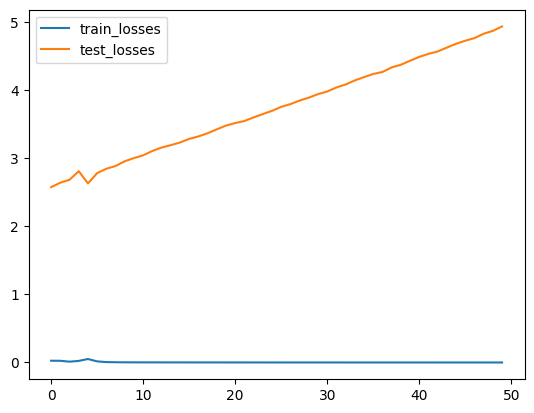

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

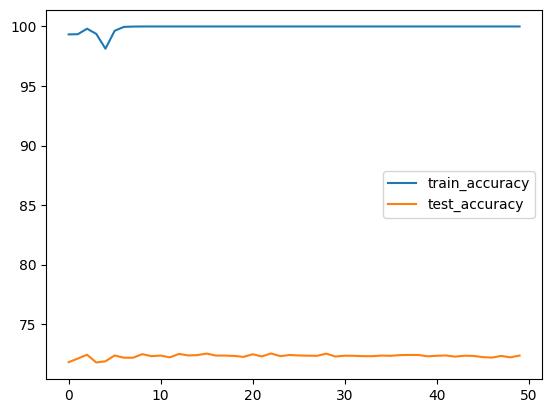

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()

In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision

# ------------------------------
# 1. Hyperparameters & Settings
# ------------------------------
torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# 2. Data Loading & Preprocessing
# ------------------------------
compute_transform = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=compute_transform, download=True)
torch.utils.data.DataLoader(dataset, batch_size=1024, shuffle=False, num_workers=2 if device == 'cuda' else 0)

mean = 0.0
for images, _ in loader:
    batch_samples = images.size(0)  # Batch size
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
mean = mean / len(loader.dataset)

variance = 0.0
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    variance += ((images - mean.unsqueeze(1))**2).sum([0,2])
std = torch.sqrt(variance / (len(loader.dataset)*32*32))

print(mean, std)



batch_size = 256
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

train_set = CIFAR10(
    root='./data', train=True,download=True, transform=transform
)

val_set = CIFAR10(
    root='./data', train=False,download=True, transform=transform
)

trainloader = DataLoader(
    train_set, batch_size=batch_size, shuffle=True, num_workers=2
)

testloader = DataLoader(
    val_set,  batch_size=batch_size, shuffle=False,  num_workers=2
)


# 3. Model Definition (Fixed and Updated: All Sigmoid to ReLU, Consistent Structure)

class CNNModel(nn.Module):
    def __init__(self, n_classes=10):
        super(CNNModel, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(128, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer9 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_layer10 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer11 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer12 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.flatten = nn.Flatten()

        self.fc_layer1 = nn.Sequential(
            nn.Linear(512 * 2 * 2, 512),
            nn.ReLU()
        )
        self.fc_layer2 = nn.Linear(512, n_classes)

        # Initialize weights
        self.initialize_weights()

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)

    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.conv_layer5(x)
        x = self.conv_layer6(x)
        x = self.conv_layer7(x)
        x = self.conv_layer8(x)
        x = self.conv_layer9(x)
        x = self.conv_layer10(x)
        x = self.conv_layer11(x)
        x = self.conv_layer12(x)
        x = self.flatten(x)
        x = self.fc_layer1(x)
        out = self.fc_layer2(x)

        return out

model = CNNModel(10).to(device)
summary(model, (3, 32, 32))

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    running_correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

    accuracy = 100 * running_correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy



# 6. Training Loop
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 50

# train
for epoch in range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()


    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)

    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

100%|██████████| 170M/170M [00:03<00:00, 49.0MB/s]


NameError: name 'loader' is not defined

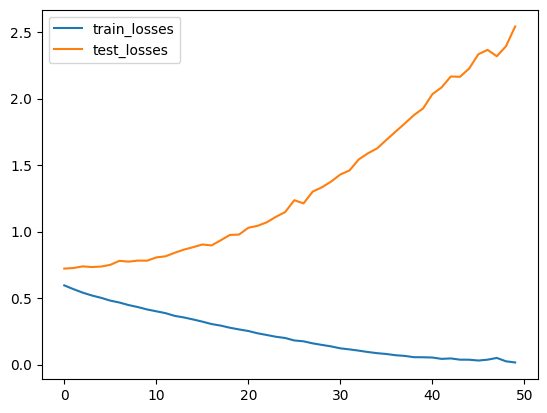

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

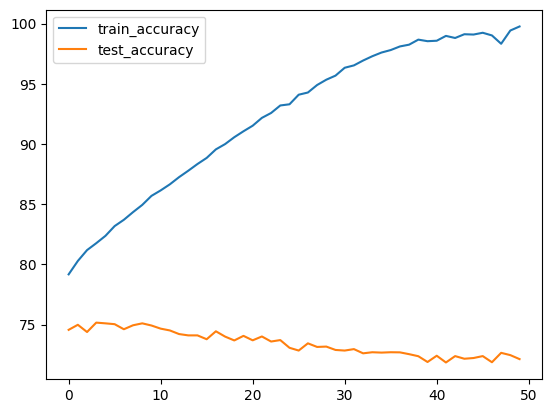

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()